<a href="https://colab.research.google.com/github/RSalgadoAyala/Math/blob/master/Math01_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sympy import *
from scipy.stats import binom
import webbrowser
import matplotlib.pyplot as plt
from sympy.plotting import plot3d
from scipy.stats import beta

Bayes theorem

In [ ]:
p_coffee_drinker = 0.65
p_cancer = 0.005
p_coffee_drinker_given_cancer = 0.85

In [ ]:
p_cancer_given_coffee_drinker = (p_coffee_drinker_given_cancer * p_cancer) / p_coffee_drinker
print(p_cancer_given_coffee_drinker)

0.006538461538461539


Using SymPy to convert an expression into LaTex

In [ ]:
x, y = symbols('x y')
z = x**2 / sqrt(2*y**3 -1)
print(latex(z))

\frac{x^{2}}{\sqrt{2 y^{3} - 1}}


Using SciPy for the binomial distribution

In [ ]:
n = 10
p = 0.9

for k in range(n + 1):
  probability = binom.pmf(k, n, p)
  print('{0} - {1}'.format(k, probability))

0 - 9.999999999999978e-11
1 - 8.999999999999978e-09
2 - 3.6449999999999943e-07
3 - 8.747999999999991e-06
4 - 0.00013778099999999974
5 - 0.0014880347999999982
6 - 0.011160260999999996
7 - 0.05739562799999997
8 - 0.1937102444999998
9 - 0.38742048899999976
10 - 0.3486784401000001


In [ ]:
n = 10
p = 0.5

for k in range(n + 1):
  probability = binom.pmf(k, n, p)
  print('{0} - {1}'.format(k, probability))

0 - 0.0009765625
1 - 0.009765625000000002
2 - 0.04394531250000004
3 - 0.1171875
4 - 0.2050781249999999
5 - 0.24609375000000003
6 - 0.2050781249999999
7 - 0.11718749999999999
8 - 0.04394531250000004
9 - 0.009765625000000002
10 - 0.0009765625


Binomial distribution from scratch

In [ ]:
# factorials multiply consecutive descending integers down to 1

def binomial_coefficient(n: int, k: int):
  return factorial(n) / (factorial(k) * factorial(n - k))

def binomial_distribution(k: int, n: int, p: float):
  return binomial_coefficient(n, k) * (p**k) * (1.0 - p) ** (n-k)

for k in range(n + 1):
  probability = binomial_distribution(k, n, p)
  print('{0} - {1}'.format(k, probability))


0 - 0.000976562500000000
1 - 0.00976562500000000
2 - 0.0439453125000000
3 - 0.117187500000000
4 - 0.205078125000000
5 - 0.246093750000000
6 - 0.205078125000000
7 - 0.117187500000000
8 - 0.0439453125000000
9 - 0.00976562500000000
10 - 0.000976562500000000


**Beta distribution**

In [ ]:
a = 8 # number of successes
b = 2 # number of failures
ps = 0.9 # probability of success

p_a = beta.cdf(ps, a, b)

print(p_a)

0.7748409780000002


There is a 77.48% chance the underlying probability of success is 90% or less

In [ ]:
p_b = 1 - beta.cdf(ps, a, b)

print(p_b)

0.22515902199999982


Out if the 8/10 successful tests, there is only a 22.5% chance the undelying success rate is 90% or greater

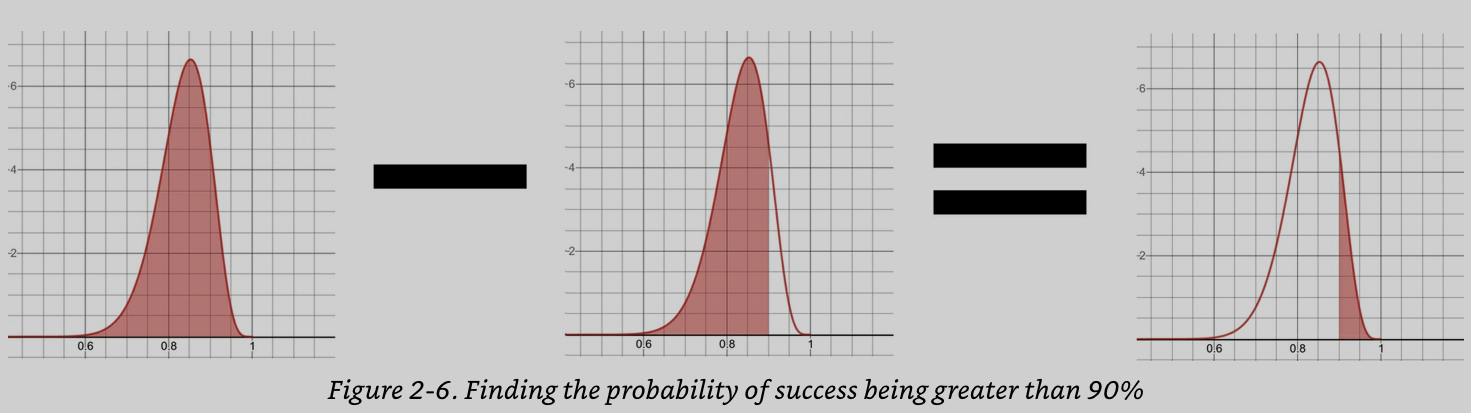

In [ ]:
a = 30
b = 2

p_c = 1.0 - beta.cdf(ps, a, b)

print(p_c)

0.8304353668991351


Calculation of the underlying rate of success between 80% to 90%

In [ ]:
a = 8
b = 2
p_s = 0.9
p_r = 0.8

p_d = beta.cdf(p_s, a, b) - beta.cdf(p_r, a, b)

print (p_d)

0.33863336199999994


There is 30% chance of rain today, and 40% chance your umbrella order will arrive on time. You are eager to walk in the rain today and cannot do so without either!
What is the probabilty it will rain AND your umbrella will arraive?

In [ ]:
p_rain = 0.3
p_umbrella = 0.4
p_rain_and_umbrella = 0.3 * 0.4
print(p_rain_and_umbrella)

0.12


There is a 30% chance of rain today, and 40% chance you umbrella order will arrive on time. You will be able to run errands only if it does not rain or your umbrella arraives.
What is the probabilyty it will not rain OR your umbrella arrives?

In [ ]:
p_not_rain = 1 - p_rain
p_no_umbrella = 1 - p_umbrella
p_rain_or_p_umbrella = p_not_rain + p_umbrella - (p_rain * p_umbrella)
print(p_rain_or_p_umbrella)

0.9800000000000001


There is a 30% chance of rain today, and 40% chance your umbrella will arrive on time. However, you found out if it rains there is only a 20% chance your umbrella will arrive on time.
What is the probability it will rain AND your umbrella will arrive on time?

In [ ]:
p_umbrella_given_rain = 0.2
p_rain_and_umbrella_2 = p_rain * p_umbrella_given_rain
print(p_rain_and_umbrella_2)

0.06


You have 137 passengers booked on a flight from Las Vegas to Dallas. However, it is Las Vegas on a Sunday morning and you estimate each passenger is 40% likely to not show up. You are trying to figure out how many seats to overbook so the plane does not fly empty.
How likely is it at least 50 passengers will not show up?

In [ ]:
n_booked = 137
p_not_show = 0.4
p_50_or_more_noshow = 0.0 # initilizes the value in the loop

for x in range(50,138):
  p_50_or_more_noshow += binom.pmf(x, n_booked, p_not_show) # summ the probabilities up to 50 passengers

print(p_50_or_more_noshow)

0.8220955881474253


You flipped a coin 19 times and got heads 15 times and tails 4 times.
Do you think this coin has any good probability of being fair? Why and why not?

In [ ]:
a = 15 # number of heads
b = 4 # number of tails
ps = 0.5 # probability of success

p_a = 1 - beta.cdf(ps, a, b)

print(p_a)

0.9962310791015625
